In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv('iris.data')
data.to_csv('iris_dataset')

In [8]:
df = pd.read_csv('iris_dataset')
df.head()

,Unnamed: 0,5.1,3.5,1.4,0.2,Iris-setosa
0,0,4.9,3.0,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.3,0.2,Iris-setosa
2,2,4.6,3.1,1.5,0.2,Iris-setosa
3,3,5.0,3.6,1.4,0.2,Iris-setosa
4,4,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   149 non-null    int64  
 1   5.1          149 non-null    float64
 2   3.5          149 non-null    float64
 3   1.4          149 non-null    float64
 4   0.2          149 non-null    float64
 5   Iris-setosa  149 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


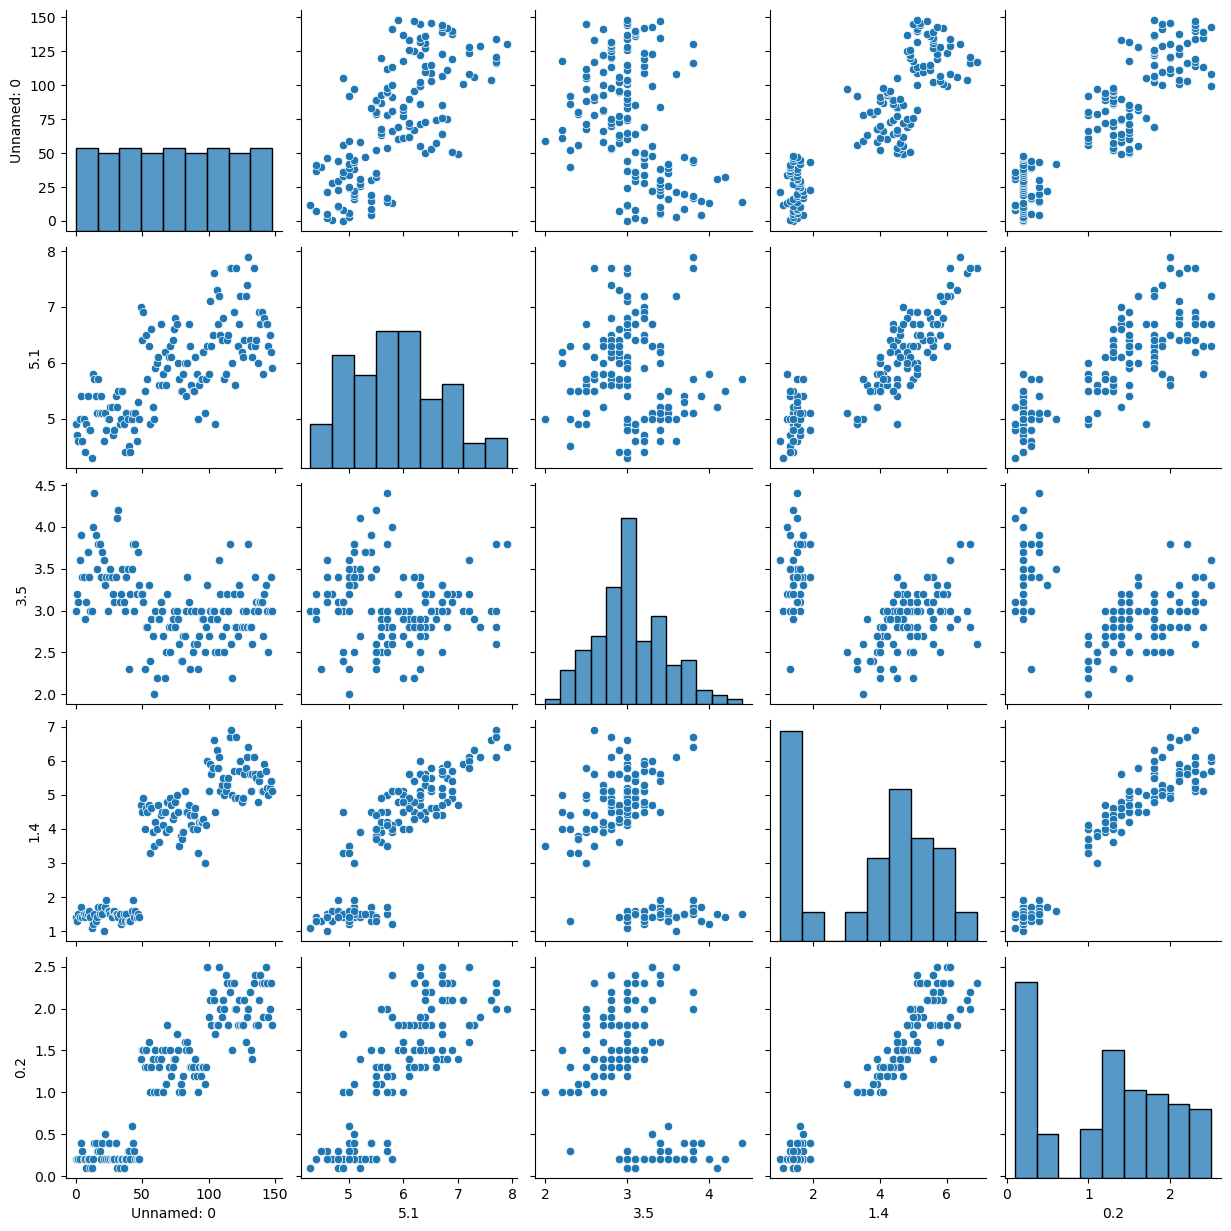

In [14]:
sns.pairplot(df)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('Iris-setosa',axis=1)
y = df['Iris-setosa']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(df.drop('Iris-setosa',axis=1))
scaled_features = scaler.transform(df.drop('Iris-setosa',axis=1))
df_feat = pd.DataFrame(scaled_features)
df_feat.head()

,0,1,2,3,4
0,-1.720465,-1.148356,-0.118060,-1.353964,-1.325063
1,-1.697216,-1.390542,0.344859,-1.410986,-1.325063
2,-1.673966,-1.511636,0.113399,-1.296943,-1.325063
3,-1.650716,-1.027262,1.270695,-1.353964,-1.325063
4,-1.627467,-0.542889,1.965072,-1.182901,-1.061466


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#first trying with value of n =1
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
pred = knn.predict(X_test)

C:\Users\PROGRAMMING\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[15  0  0]
 [ 0 16  0]
 [ 0  0 14]]


In [40]:
cr = classification_report(y_test,pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

